# TEXT VECTORIZATION — COUNT VECTORIZER & TF-IDF

### LIBRARY

In [ ]:
import pandas as pd                           # FOR DATA HANDLING
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # FOR TEXT VECTORIZATION
from sklearn.model_selection import train_test_split   # FOR TRAIN-TEST SPLIT

### LOAD CLEANED DATASET 

In [2]:
# LOAD DATASET CONTAINING 'clean_text' AND 'label'
df = pd.read_csv("../DATA/DATA[C].csv")  # CLEANED TEXT DATA

# DISPLAY BASIC INFO
print("SHAPE:", df.shape)
print("COLUMNS:", df.columns)
df.head()

SHAPE: (38647, 3)
COLUMNS: Index(['text', 'label', 'clean_text'], dtype='object')


,text,label,clean_text
0,"21st Century Wire says Ben Stein, reputable pr...",0,century wire say ben stein reputable professor...
1,WASHINGTON (Reuters) - U.S. President Donald T...,1,washington reuters president donald trump remo...
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1,reuters puerto rico governor ricardo rossello ...
3,"On Monday, Donald Trump once again embarrassed...",0,monday donald trump embarrassed country accide...
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1,glasgow scotland reuters presidential candidat...


### SPLIT FEATURES (TEXT) AND TARGET (LABEL)

In [3]:
# SET INDEPENDENT VARIABLE: CLEANED TEXT
X = df['clean_text']

# SET TARGET VARIABLE: LABEL (0 = FAKE, 1 = REAL)
y = df['label']

### TRAIN-TEST SPLIT

In [4]:
# SPLIT INTO TRAIN AND TEST SETS — 80% TRAIN, 20% TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# DISPLAY SHAPES
print("X_train SHAPE:", X_train.shape)
print("X_test SHAPE:", X_test.shape)

X_train SHAPE: (30917,)
X_test SHAPE: (7730,)


### COUNT VECTORIZER — WORD FREQUENCY BASED

In [7]:
# FILL MISSING VALUES (NaN) IN TRAIN AND TEST TEXT DATA WITH EMPTY STRINGS
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# INITIALIZE COUNT VECTORIZER WITH A LIMIT OF TOP 5000 FEATURES
count_vectorizer = CountVectorizer(max_features=5000)

# FIT THE COUNT VECTORIZER ON TRAINING DATA AND TRANSFORM TRAINING DATA
X_train_count = count_vectorizer.fit_transform(X_train)

# TRANSFORM TEST DATA USING THE FITTED COUNT VECTORIZER
X_test_count = count_vectorizer.transform(X_test)

# DISPLAY THE SHAPE OF THE TRANSFORMED TRAINING AND TEST DATA
print("COUNT VECTORIZER - X_train SHAPE:", X_train_count.shape)
print("COUNT VECTORIZER - X_test SHAPE:", X_test_count.shape)

COUNT VECTORIZER - X_train SHAPE: (30917, 5000)
COUNT VECTORIZER - X_test SHAPE: (7730, 5000)


### TF-IDF VECTORIZER — TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY

In [8]:
# FILL MISSING VALUES IN TRAIN AND TEST TEXT DATA WITH EMPTY STRINGS
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# INITIALIZE TF-IDF VECTORIZER WITH A LIMIT OF TOP 5000 FEATURES
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# FIT THE TF-IDF VECTORIZER ON TRAINING TEXT AND TRANSFORM TRAINING TEXT
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# TRANSFORM TEST TEXT USING THE FITTED TF-IDF VECTORIZER
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# DISPLAY THE SHAPE OF THE TRANSFORMED TRAINING AND TEST DATA
print("TF-IDF VECTORIZER - X_train SHAPE:", X_train_tfidf.shape)
print("TF-IDF VECTORIZER - X_test SHAPE:", X_test_tfidf.shape)

TF-IDF VECTORIZER - X_train SHAPE: (30917, 5000)
TF-IDF VECTORIZER - X_test SHAPE: (7730, 5000)


# MACHINE LEARNING MODEL TRAINING

### LIBRARY

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

### HELPER FUNCTION TO TRAIN & EVALUATE MODELS

In [24]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, title="Model"):
    """
    TRAINS THE MODEL, PREDICTS ON TEST SET, PRINTS METRICS, AND PLOTS CONFUSION MATRIX.
    """

    model.fit(X_train, y_train)                             # TRAIN THE MODEL
    y_pred = model.predict(X_test)                          # PREDICT ON TEST DATA
    
    acc = accuracy_score(y_test, y_pred)                    # CALCULATE ACCURACY
    print(f"\n===== {title.upper()} =====")
    print("ACCURACY -->", round(acc * 100, 2), "%")
    print("\nCLASSIFICATION REPORT -->\n", classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 4), dpi=500)

    # DEFINE BOLD FONT PROPERTIES FOR AXIS LABELS AND COLORBAR
    bold_font = FontProperties(weight='bold', size=10)

    # PLOT HEATMAP WITH BOLD ANNOTATION TEXT INSIDE GRID CELLS
    ax = sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='YlGnBu',
        xticklabels=["FAKE", "REAL"],
        yticklabels=["FAKE", "REAL"],
        annot_kws={"weight": "bold", "fontsize": 10, "color": "black"}
    )

    # SET TITLES AND AXES LABELS
    plt.title(f"{title.upper()} - CONFUSION MATRIX", fontsize=14, fontweight='bold', color='black')
    plt.xlabel("PREDICTED", fontsize=12, fontweight='bold', color='black')
    plt.ylabel("ACTUAL", fontsize=12, fontweight='bold', color='black')

    # MAKE TICK LABELS BOLD
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=bold_font, color='black')
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=bold_font, color='black')

    # MAKE COLORBAR TICK LABELS BOLD
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_tick_params(labelsize=10)
    for label in cbar.ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_color('black')

    # CUSTOMIZE PLOT BORDERS
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_color('black')

    plt.tight_layout()
    plt.show()

### TRAIN & EVALUATE ON COUNT VECTORIZER FEATURES


===== LOGISTIC REGRESSION (COUNT) =====
ACCURACY --> 99.31 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3491
        Real       0.99      0.99      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



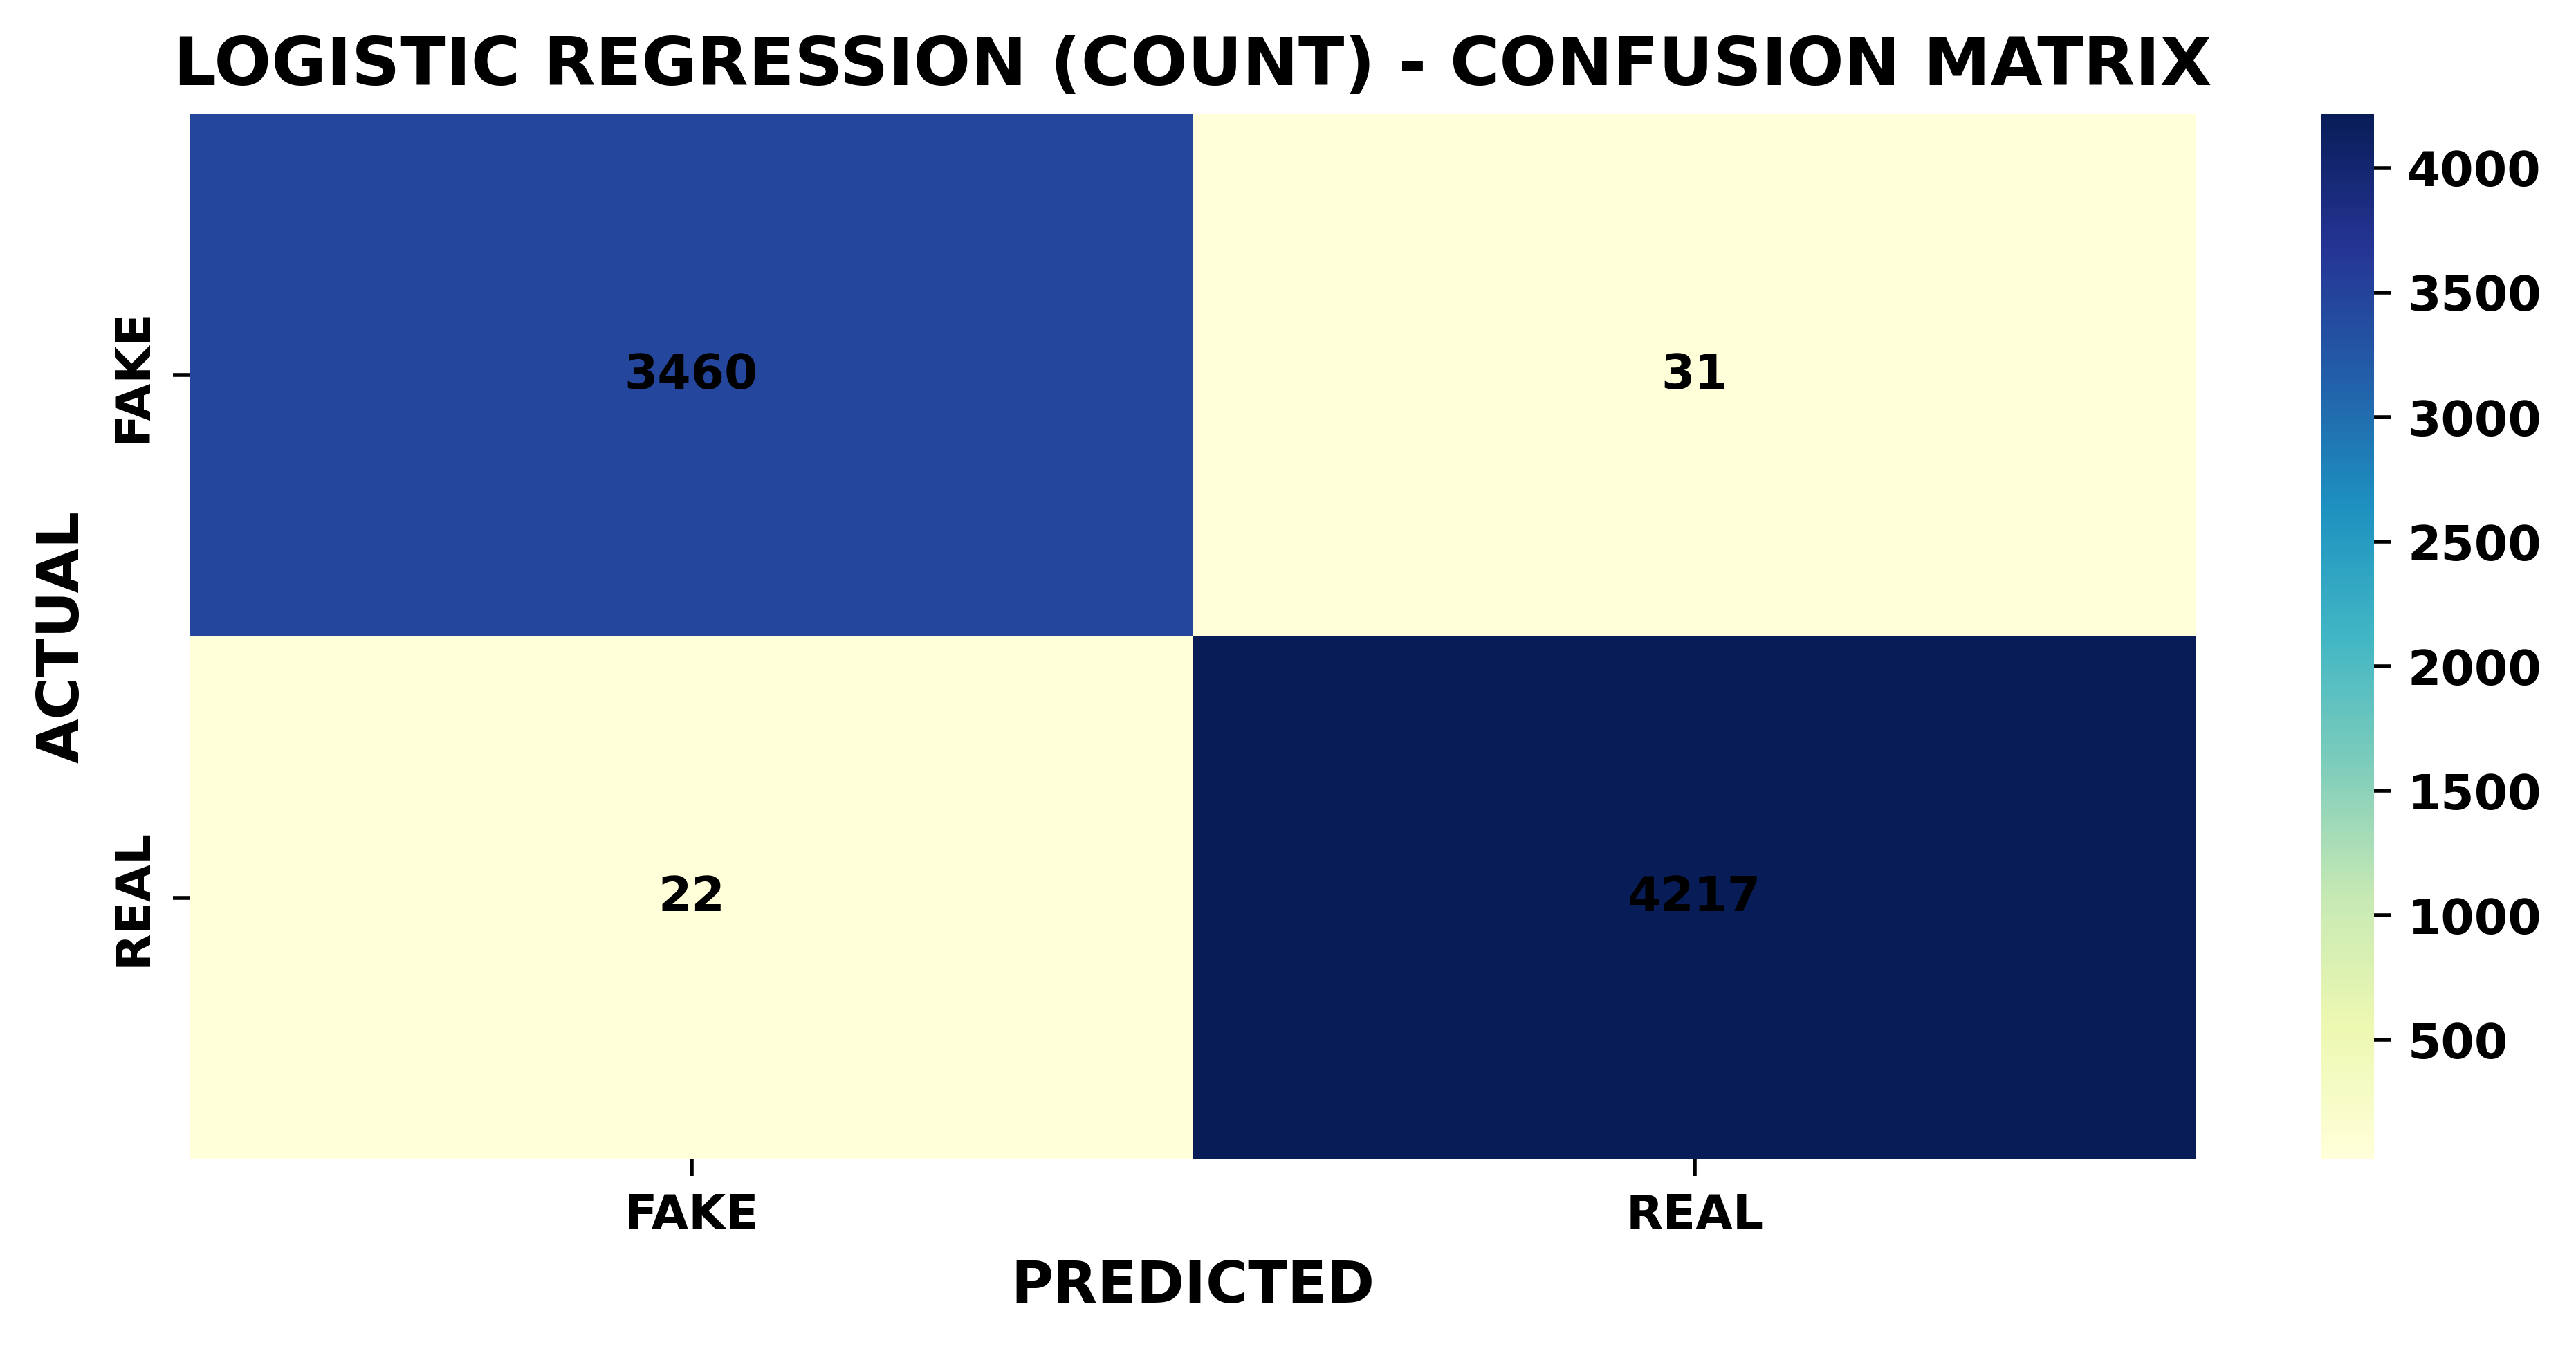


===== NAIVE BAYES (COUNT) =====
ACCURACY --> 93.79 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       0.93      0.93      0.93      3491
        Real       0.94      0.94      0.94      4239

    accuracy                           0.94      7730
   macro avg       0.94      0.94      0.94      7730
weighted avg       0.94      0.94      0.94      7730



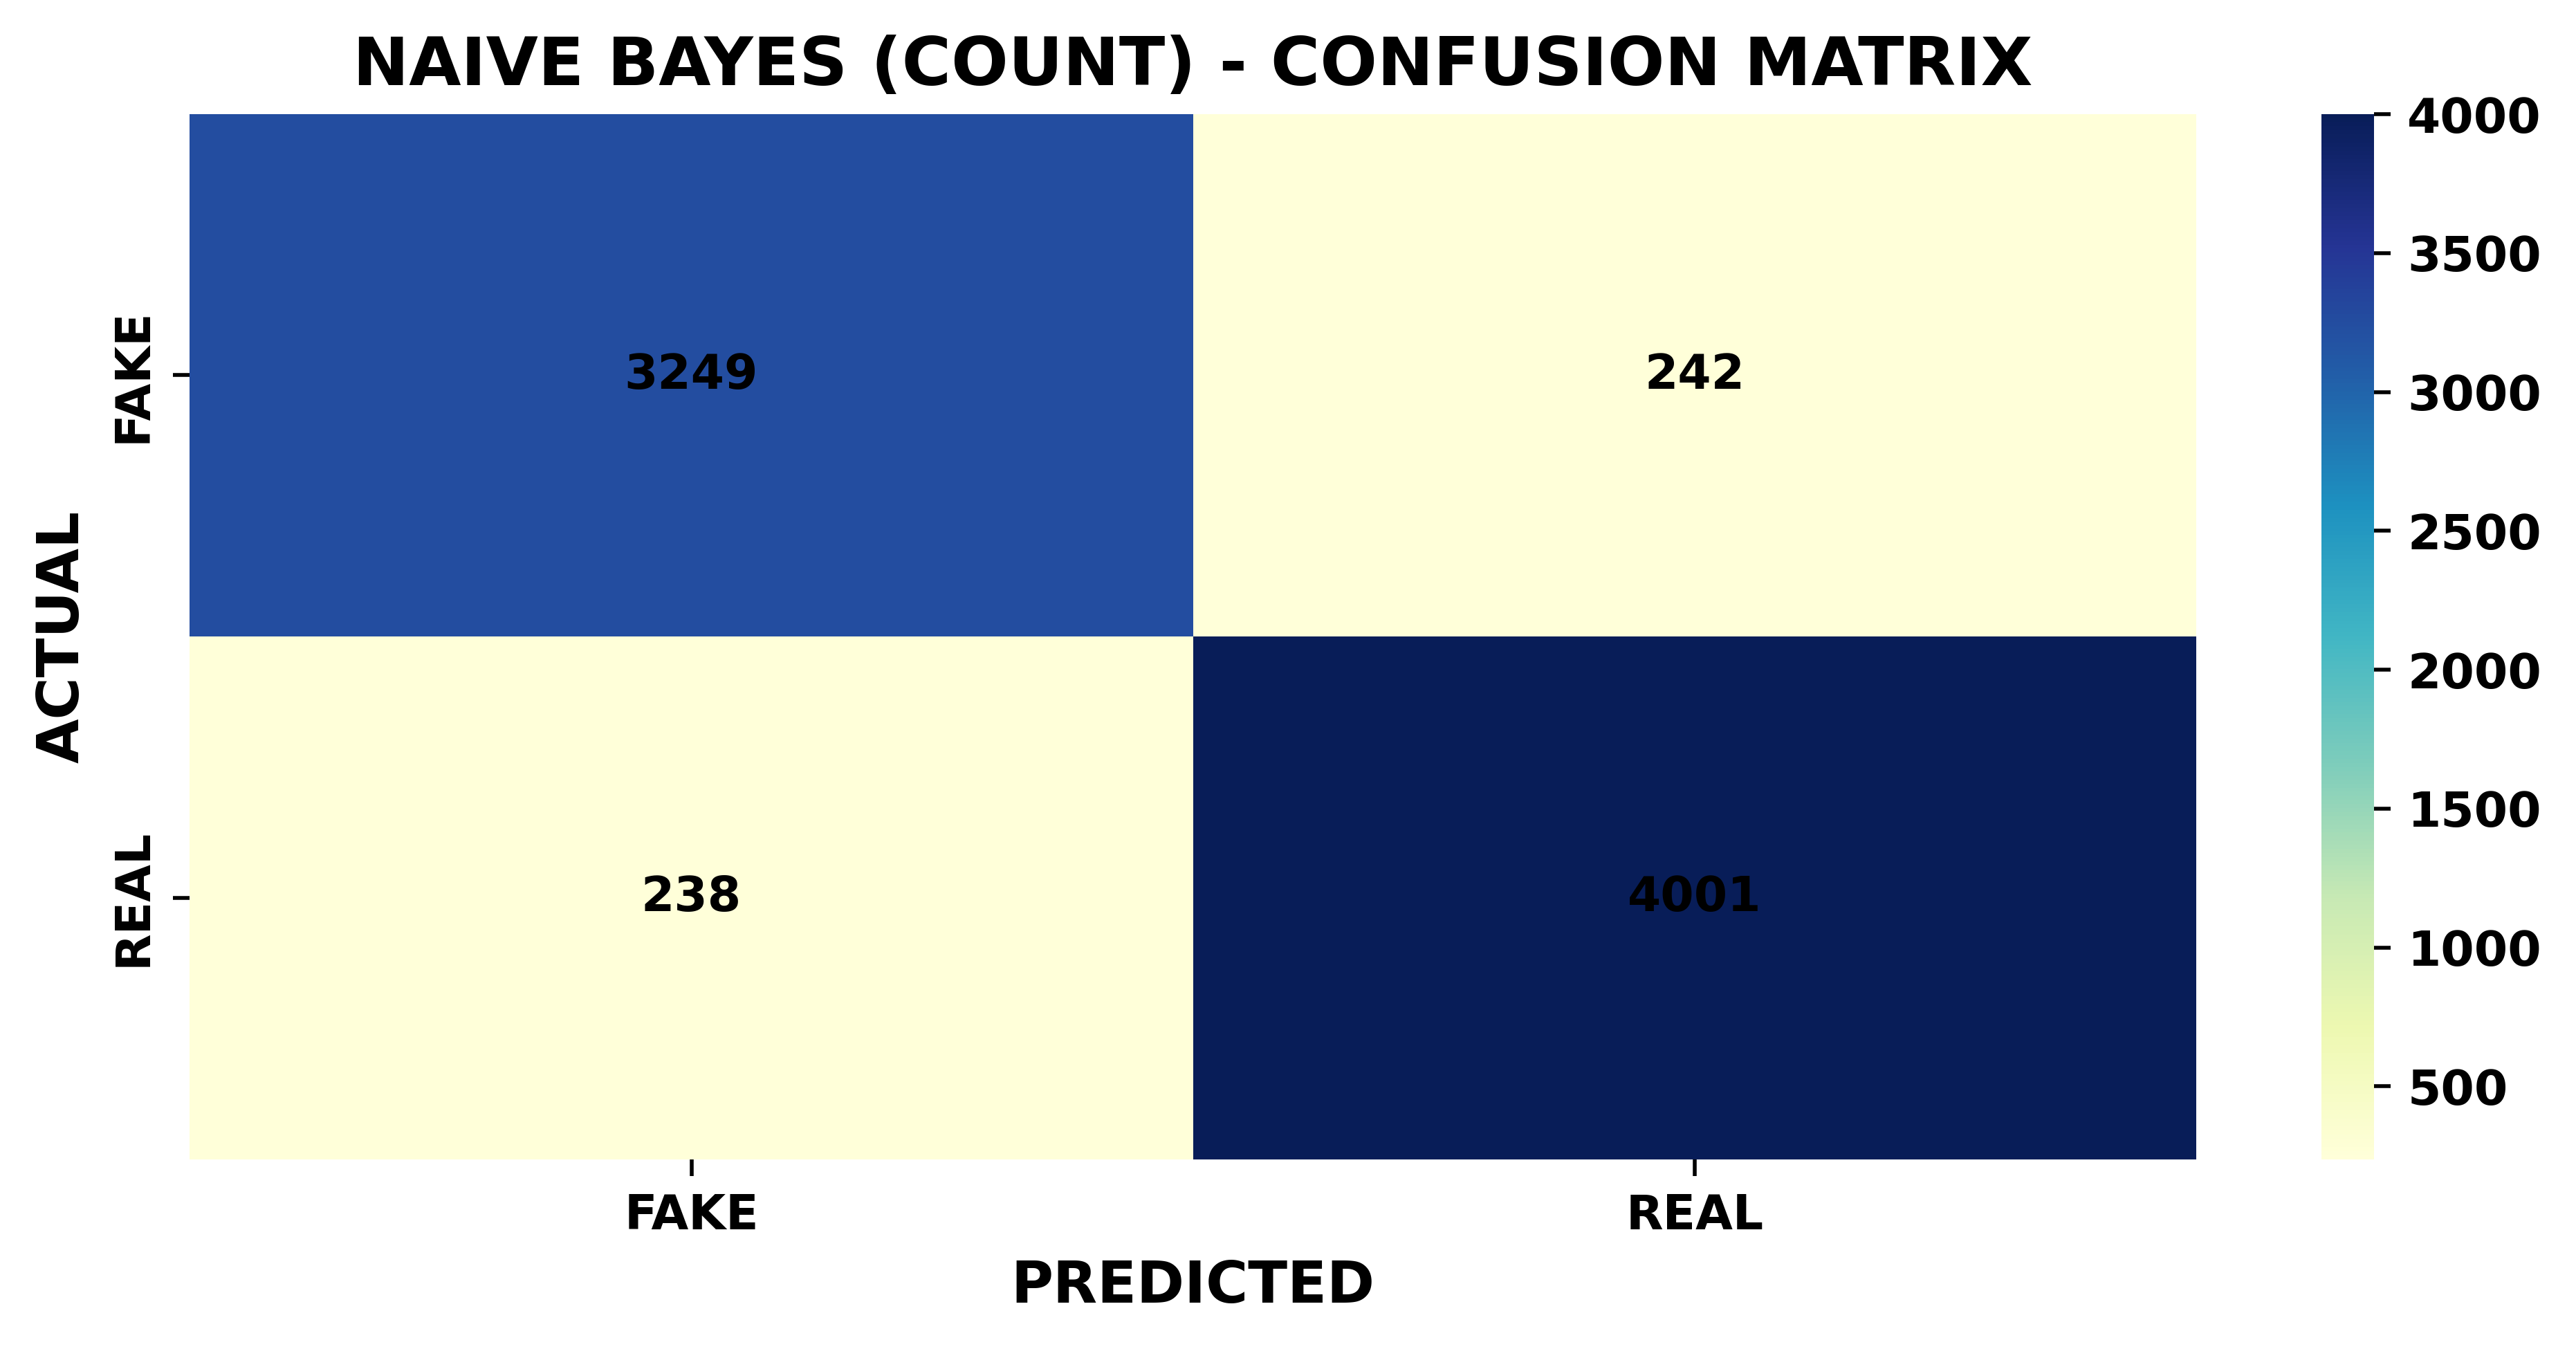


===== RANDOM FOREST (COUNT) =====
ACCURACY --> 99.66 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      3491
        Real       1.00      1.00      1.00      4239

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



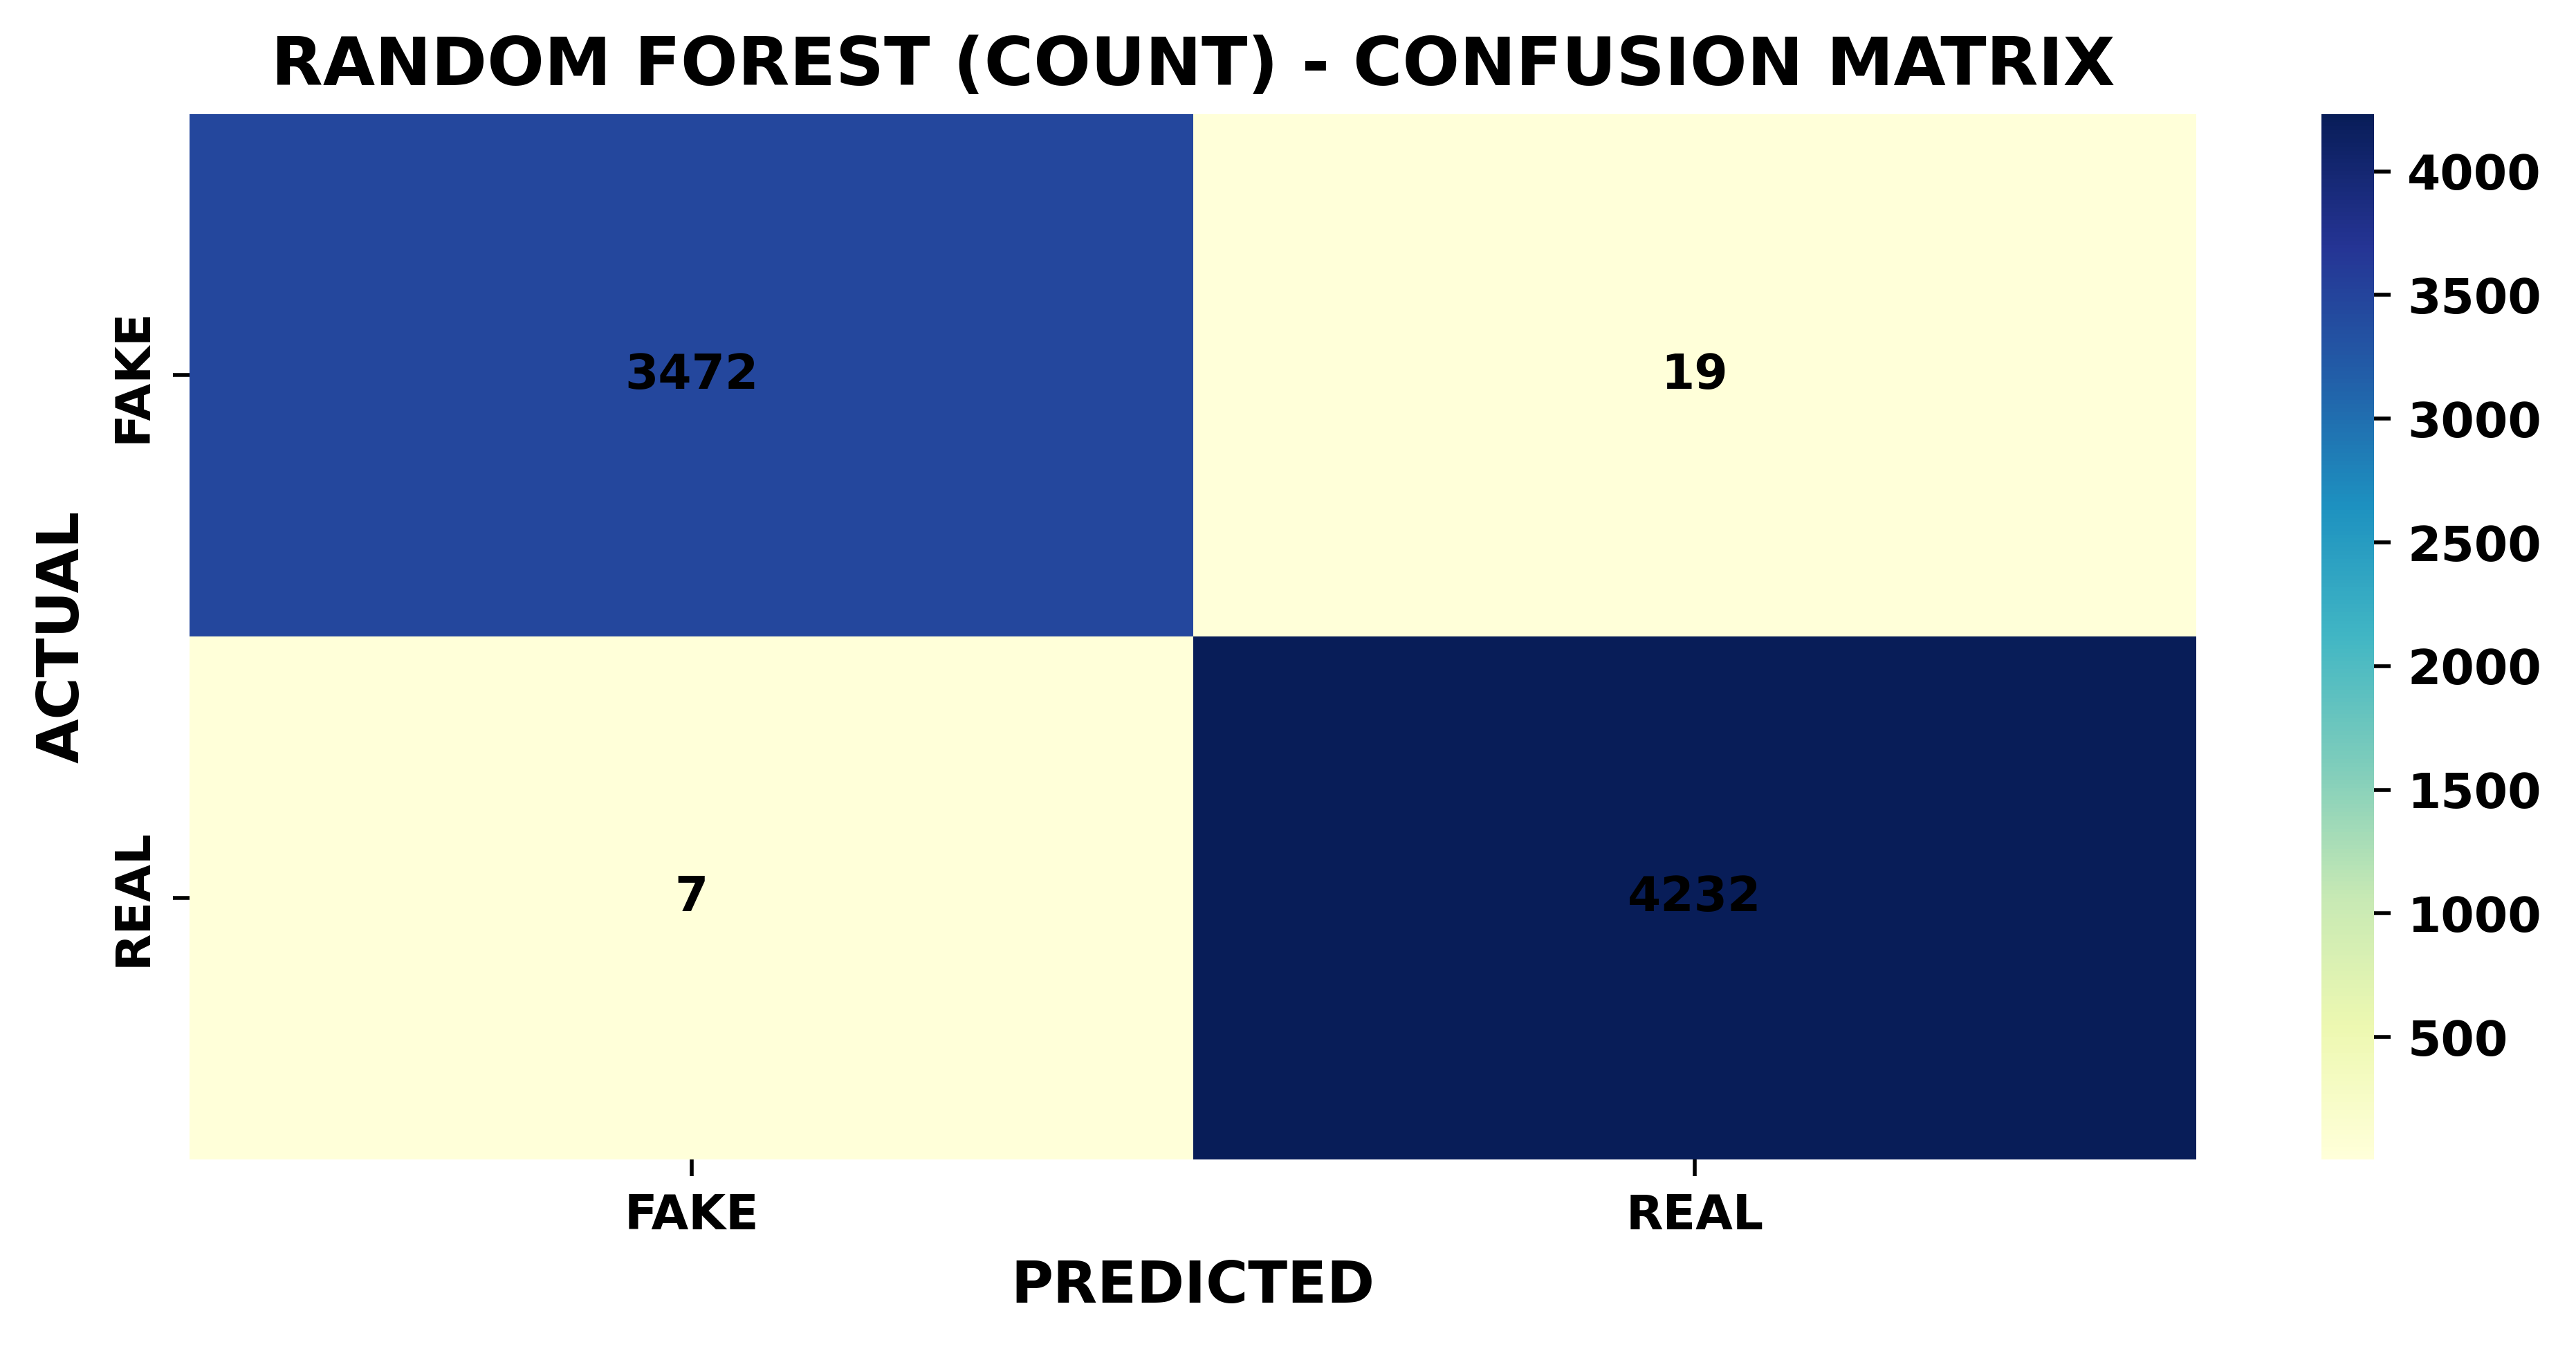


===== SVM (COUNT) =====
ACCURACY --> 99.24 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3491
        Real       0.99      0.99      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



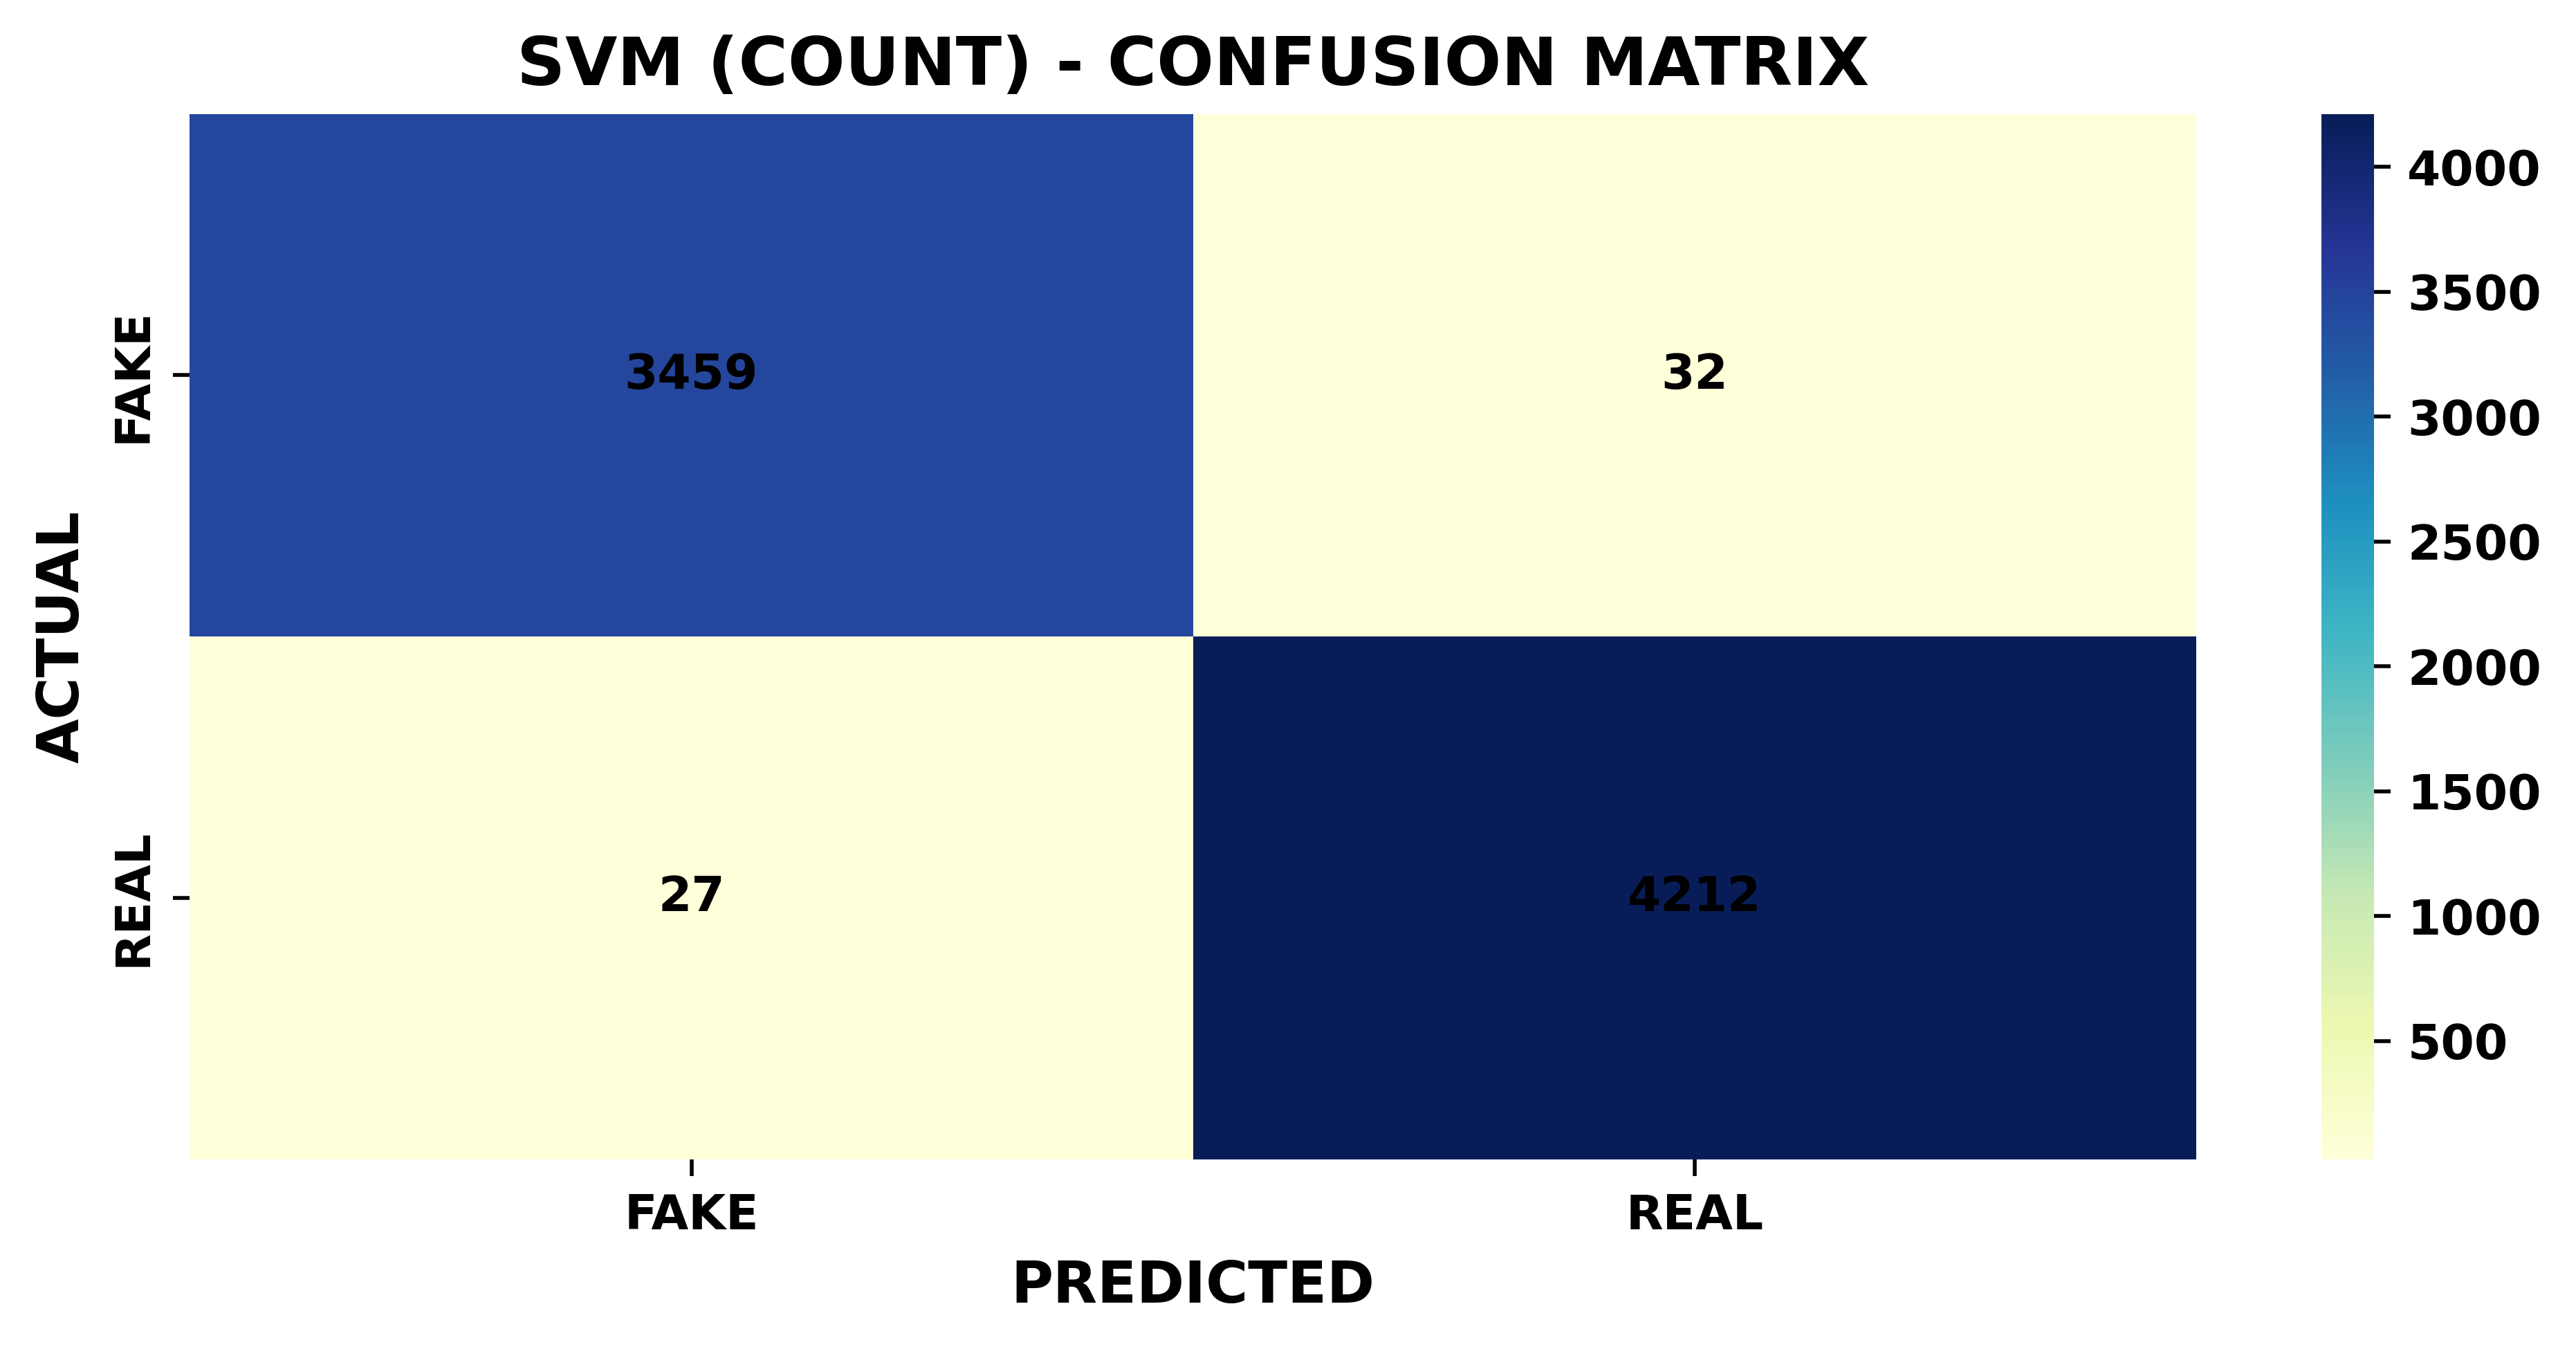

In [25]:
# LOGISTIC REGRESSION
train_and_evaluate(LogisticRegression(max_iter=1000), X_train_count, y_train, X_test_count, y_test, title="Logistic Regression (Count)")

# NAIVE BAYES
train_and_evaluate(MultinomialNB(), X_train_count, y_train, X_test_count, y_test, title="Naive Bayes (Count)")

# RANDOM FOREST
train_and_evaluate(RandomForestClassifier(n_estimators=100), X_train_count, y_train, X_test_count, y_test, title="Random Forest (Count)")

# SVM
train_and_evaluate(LinearSVC(), X_train_count, y_train, X_test_count, y_test, title="SVM (Count)")

### TRAIN & EVALUATE ON TF-IDF FEATURES


===== LOGISTIC REGRESSION (TF-IDF) =====
ACCURACY --> 98.24 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       0.99      0.97      0.98      3491
        Real       0.98      0.99      0.98      4239

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



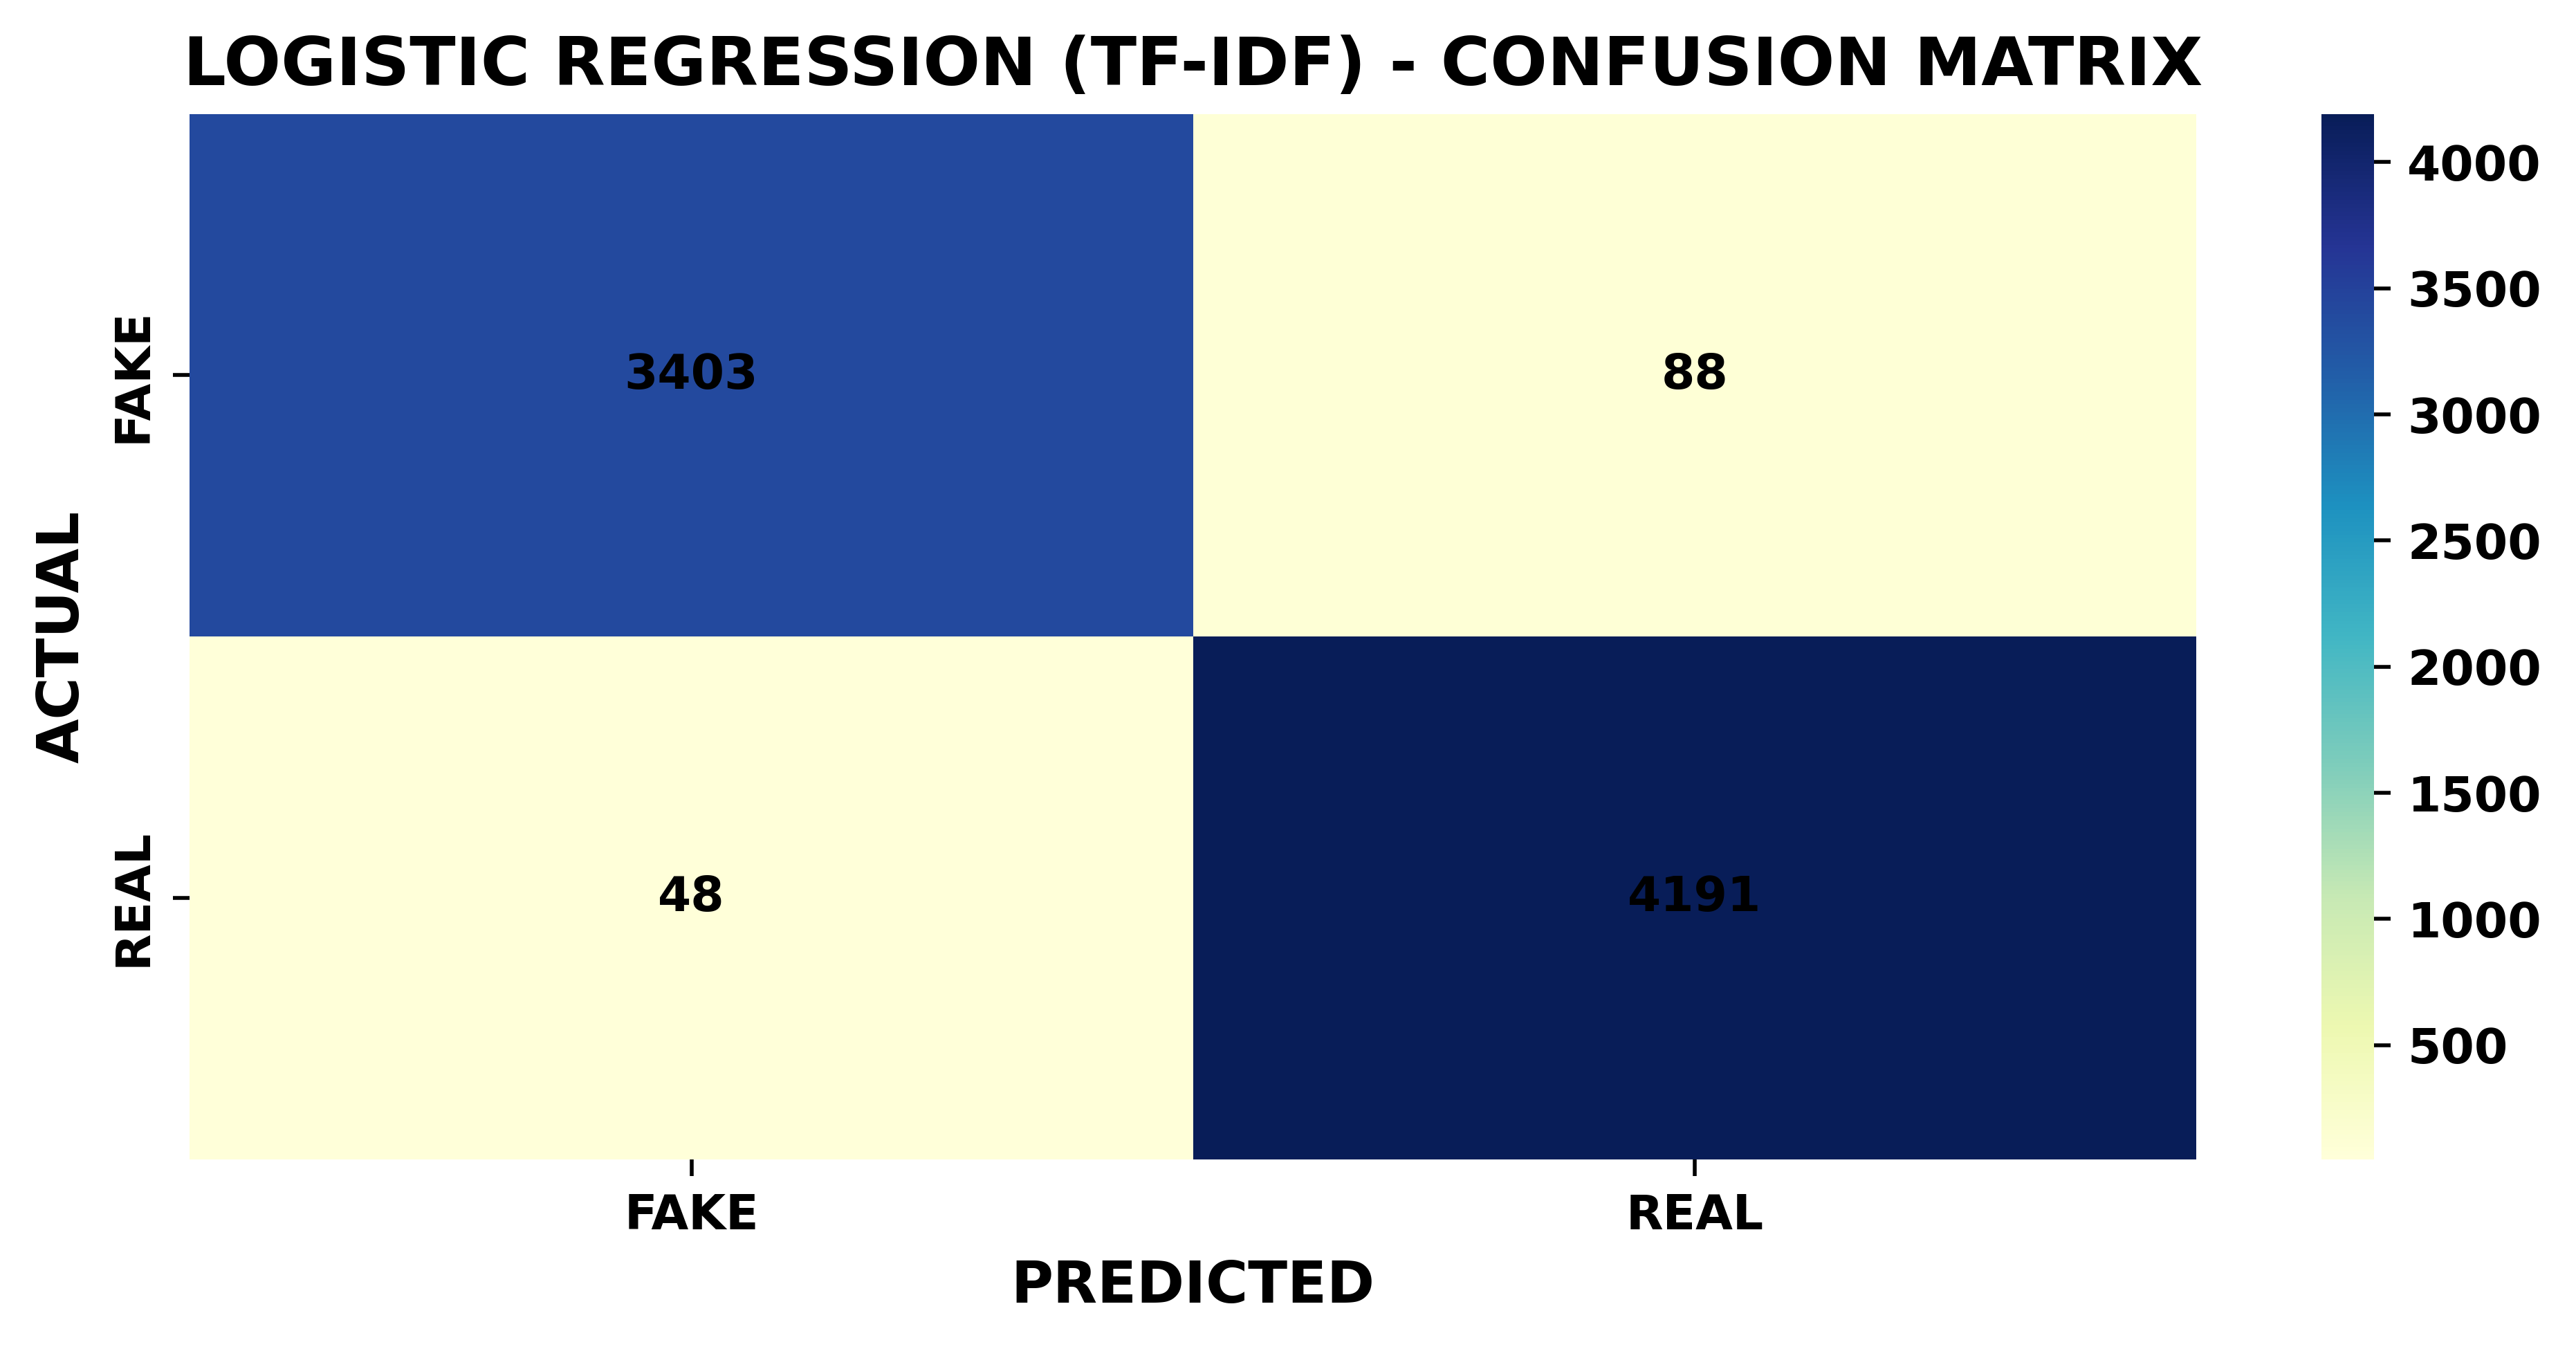


===== NAIVE BAYES (TF-IDF) =====
ACCURACY --> 92.38 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       0.92      0.91      0.92      3491
        Real       0.93      0.93      0.93      4239

    accuracy                           0.92      7730
   macro avg       0.92      0.92      0.92      7730
weighted avg       0.92      0.92      0.92      7730



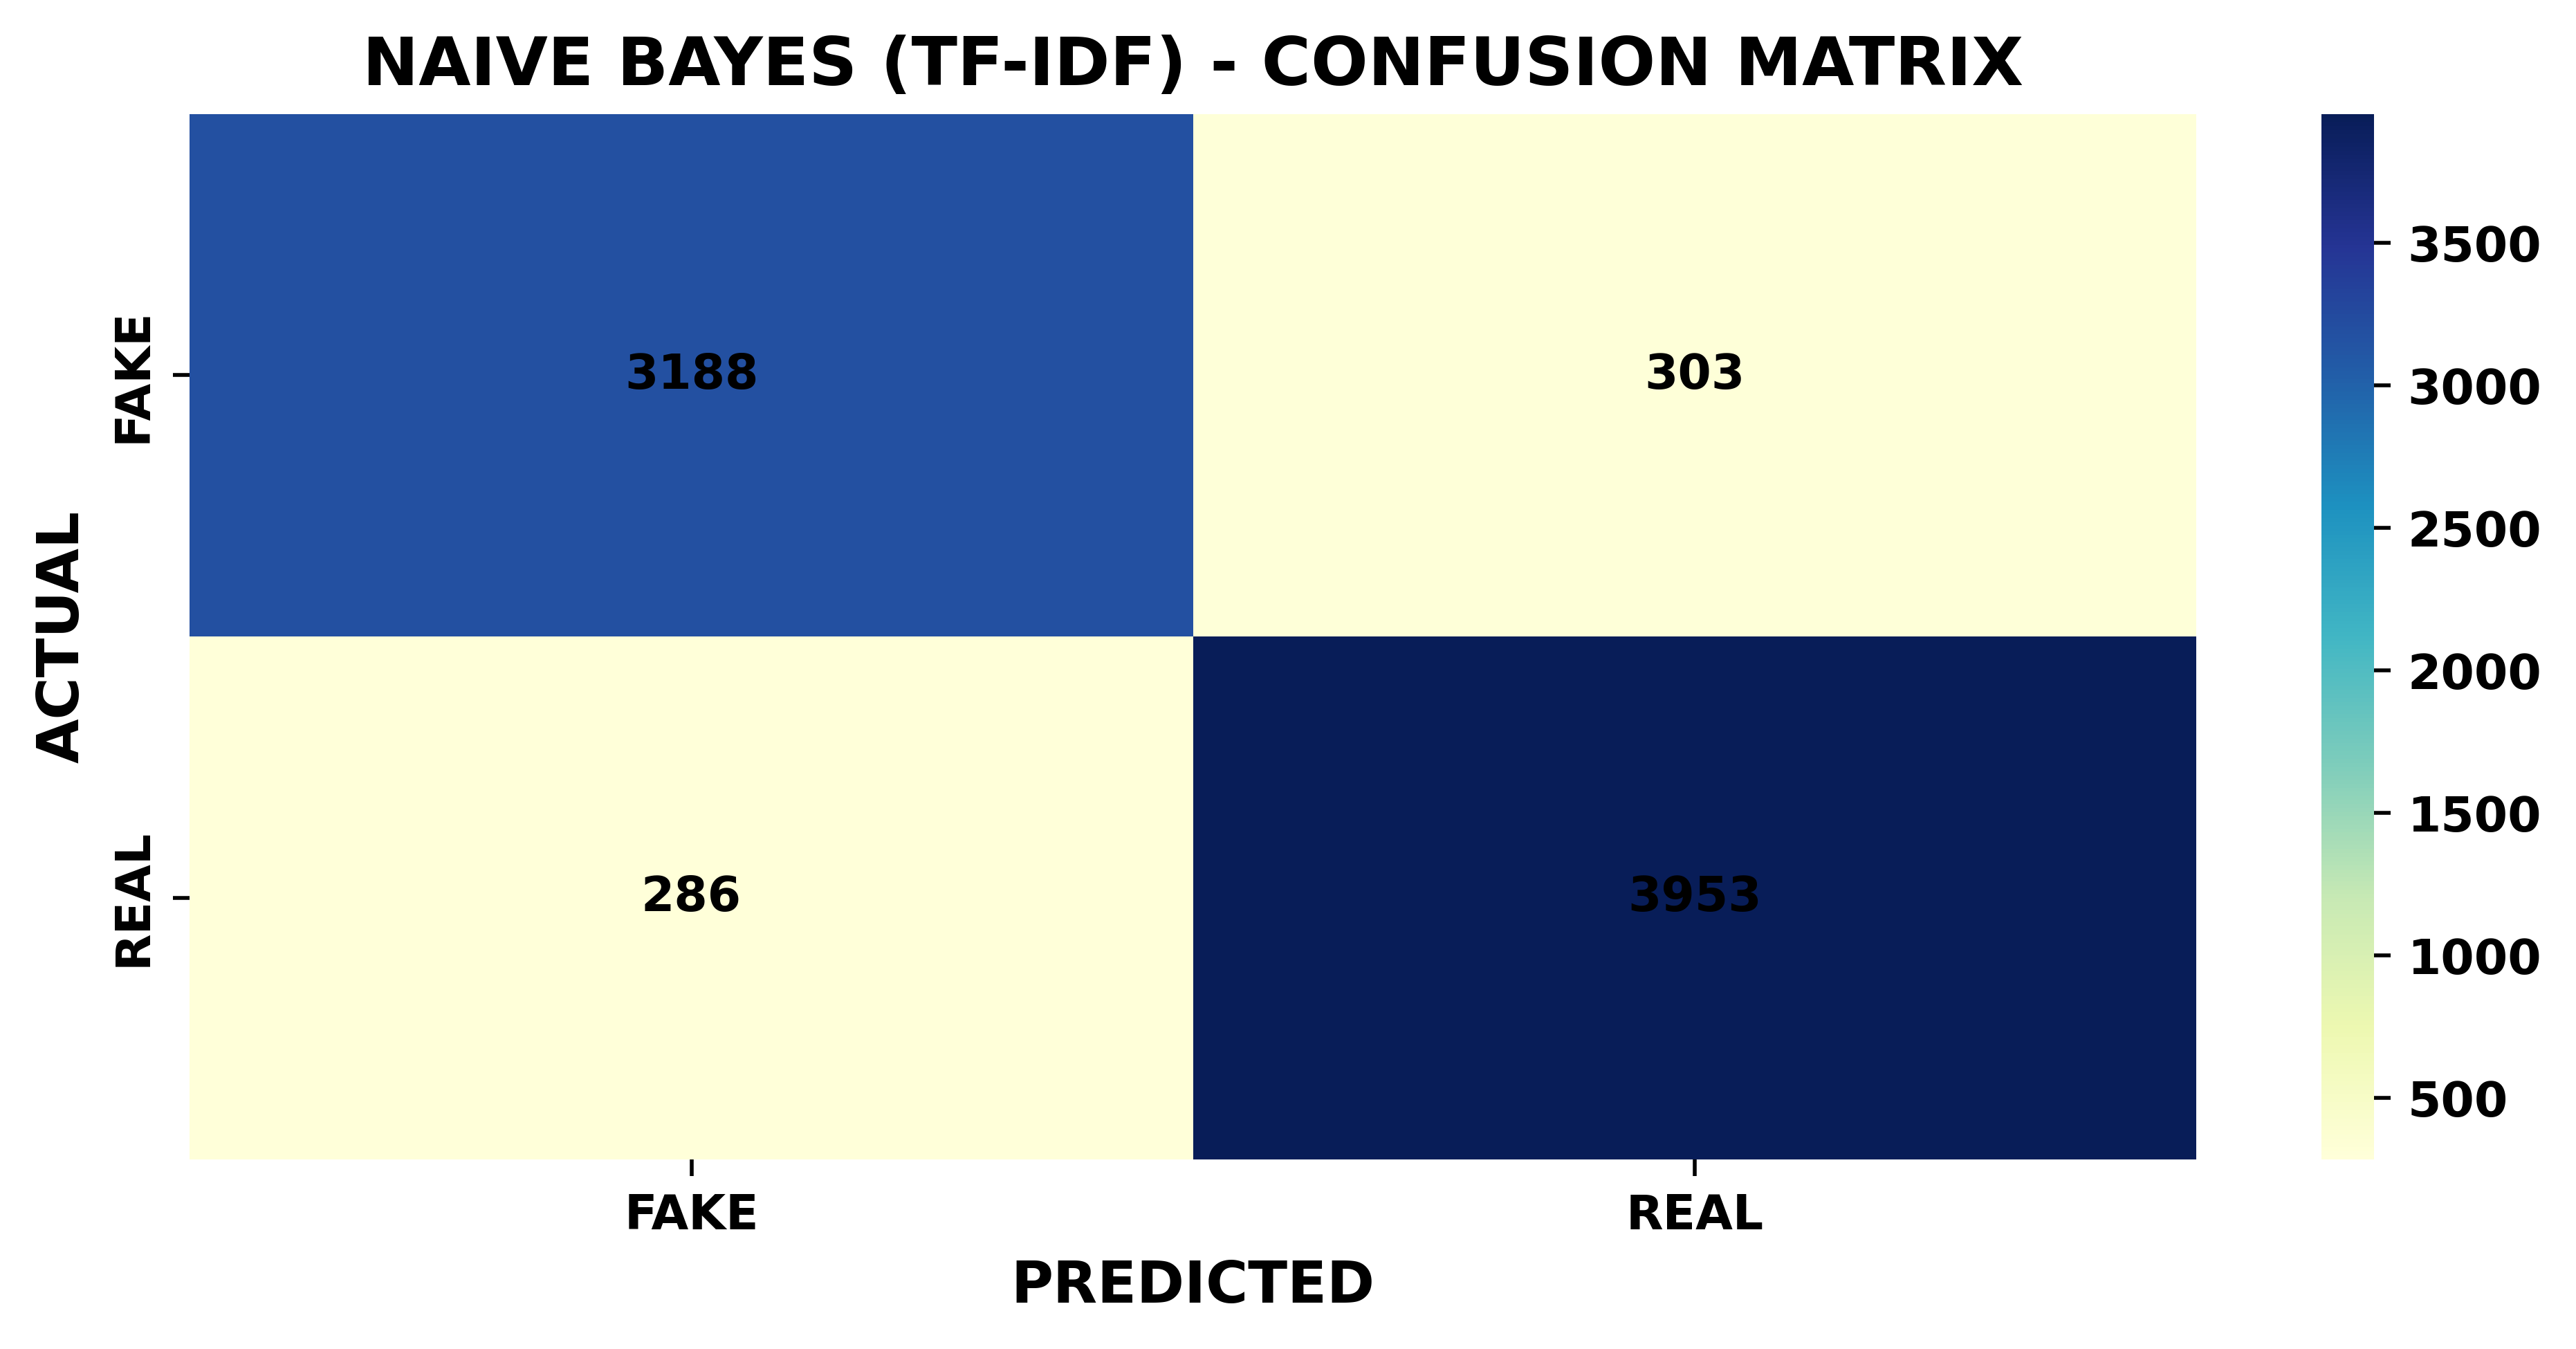


===== RANDOM FOREST (TF-IDF) =====
ACCURACY --> 99.55 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      3491
        Real       1.00      1.00      1.00      4239

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



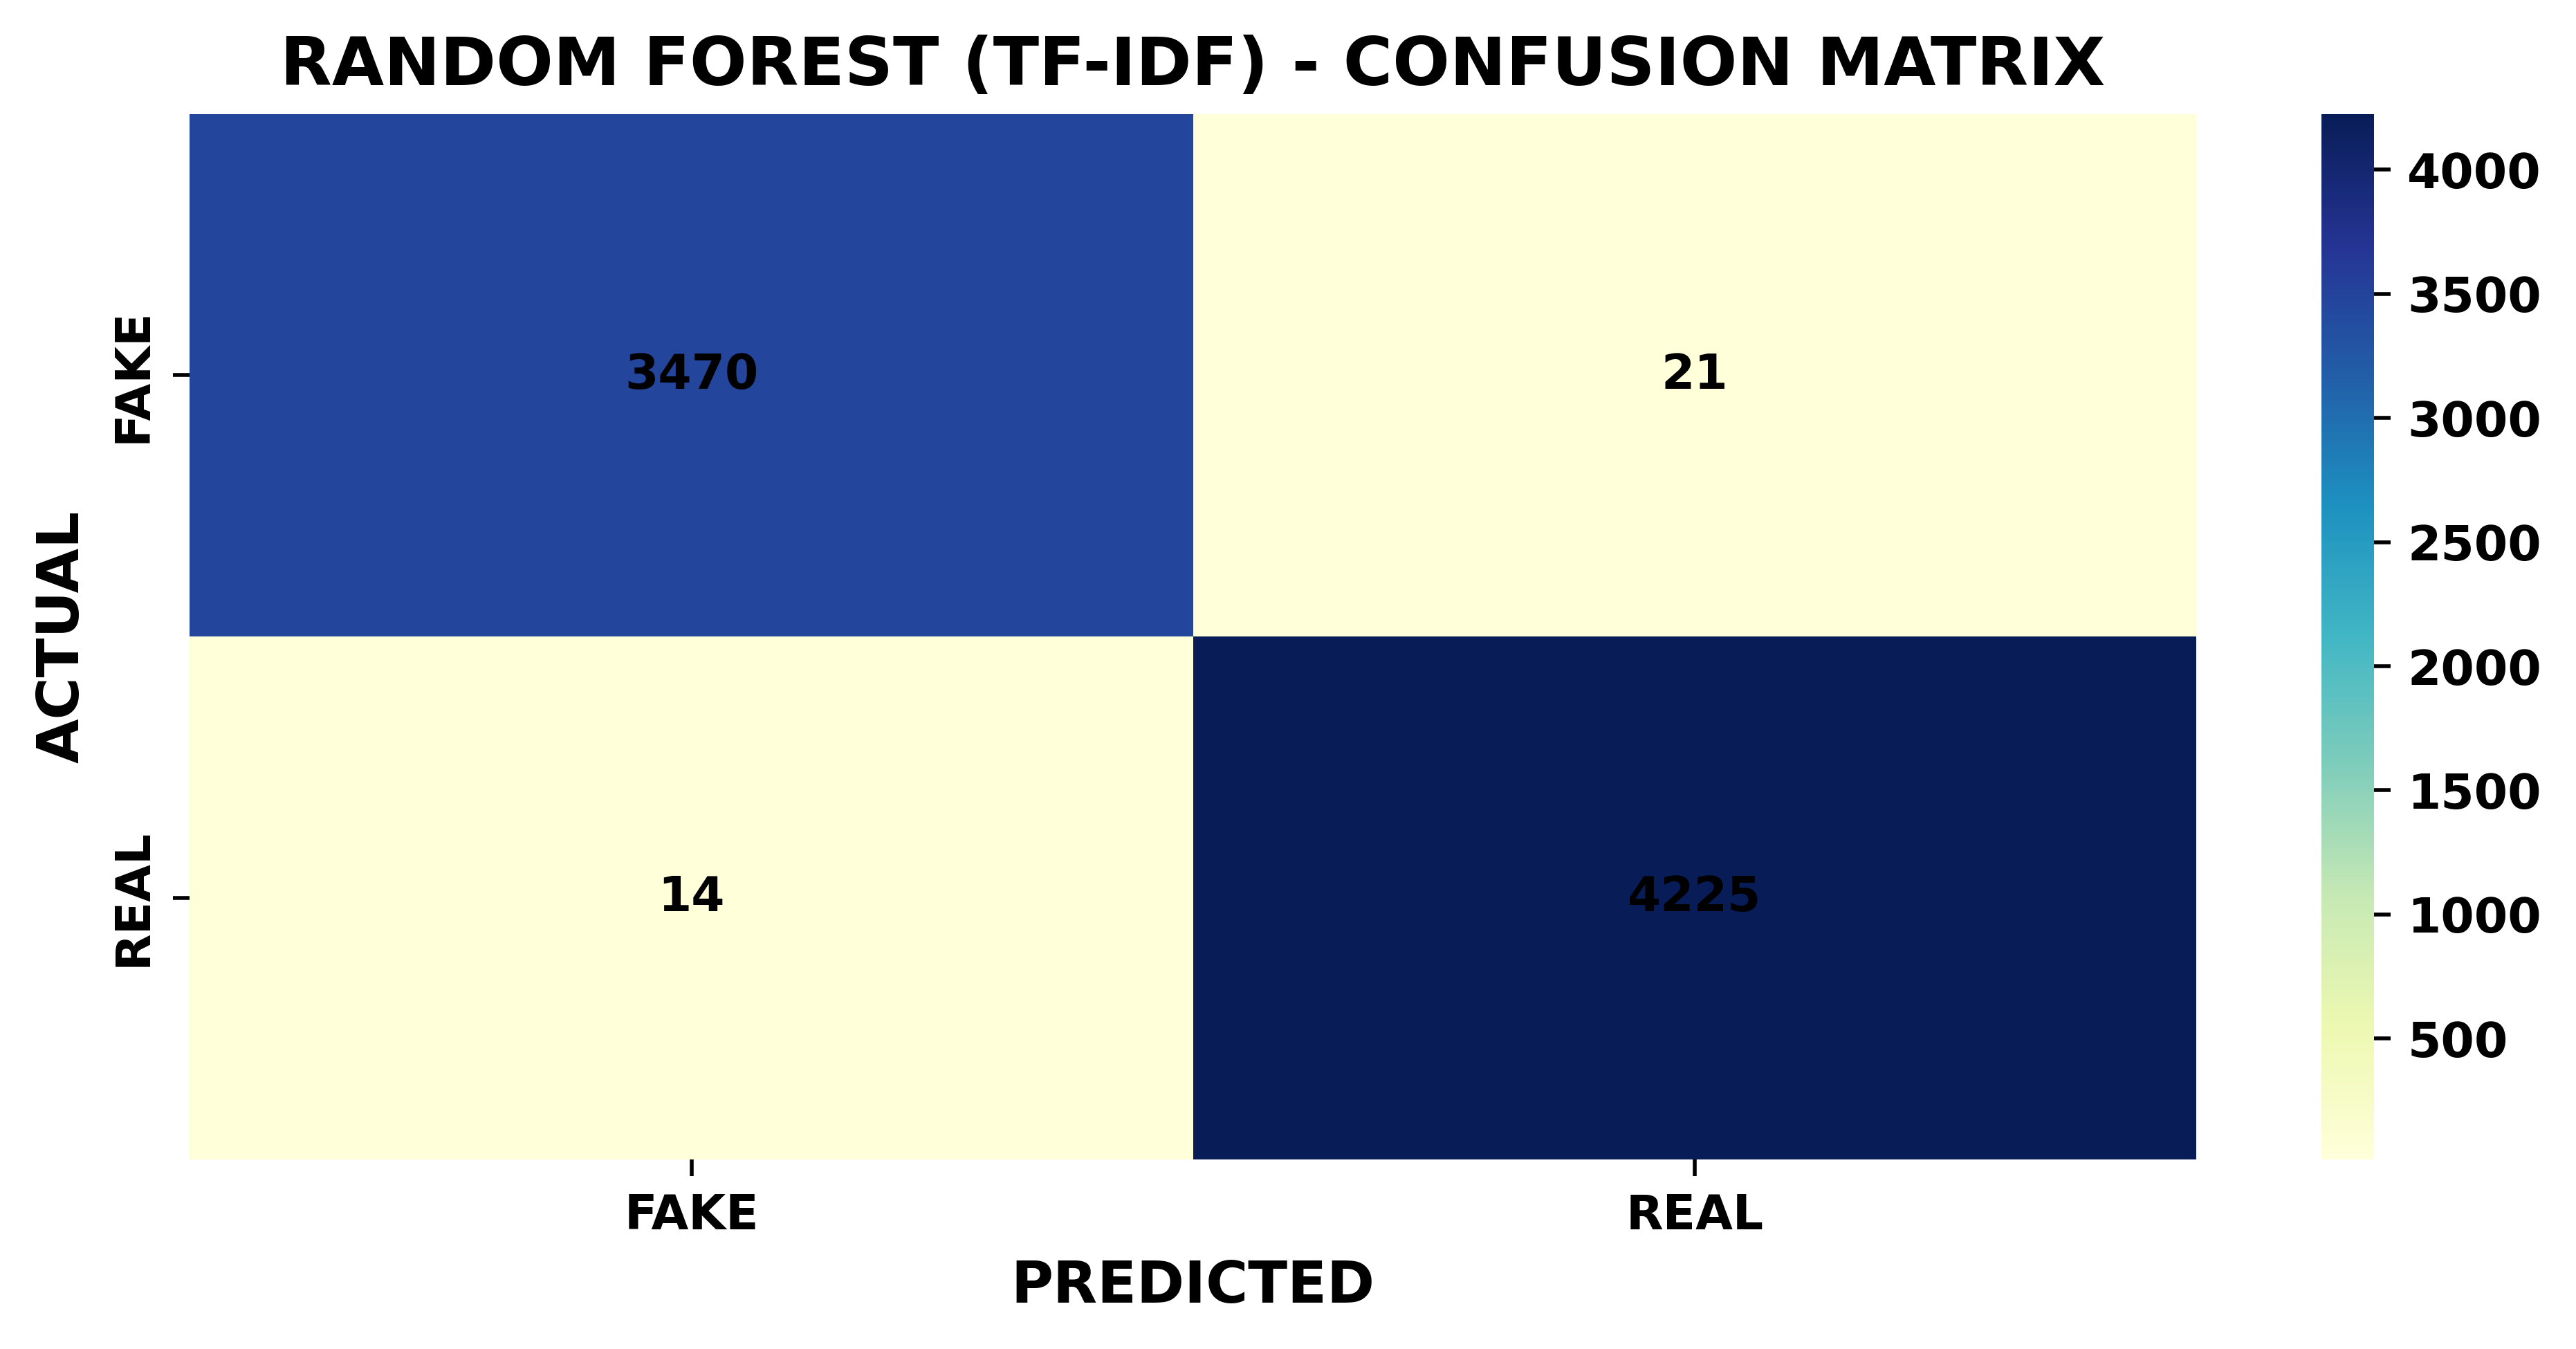


===== SVM (TF-IDF) =====
ACCURACY --> 98.98 %

CLASSIFICATION REPORT -->
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3491
        Real       0.99      0.99      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



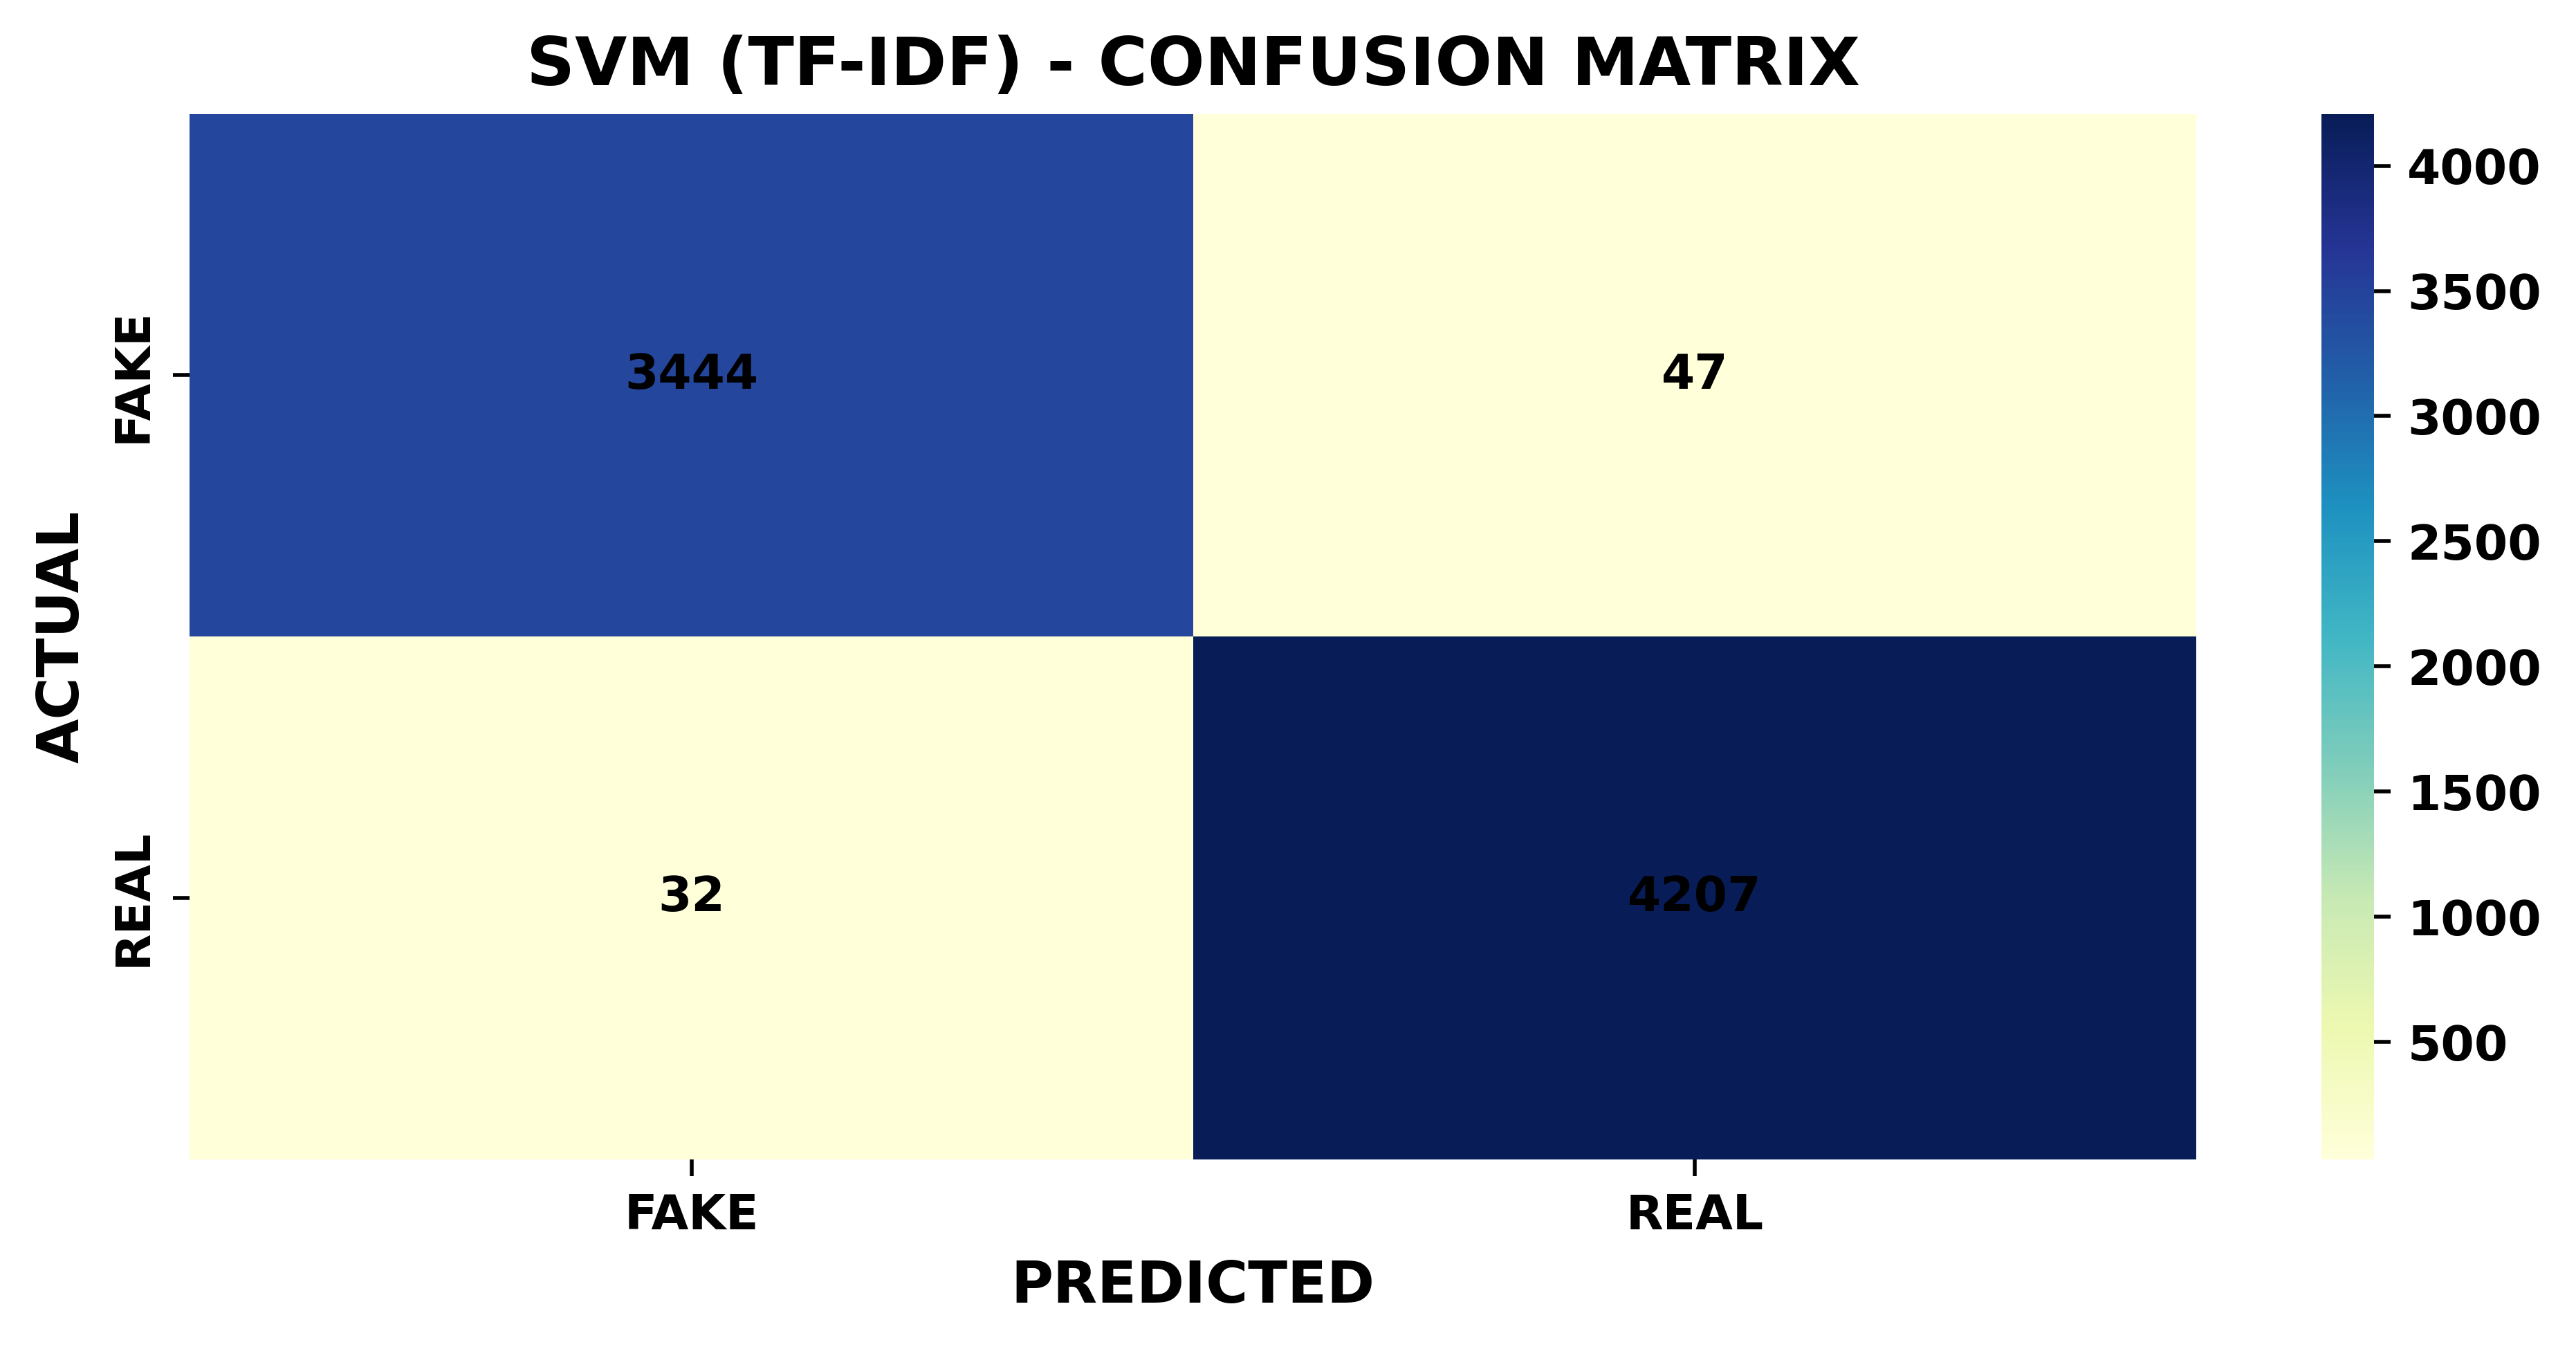

In [26]:
# LOGISTIC REGRESSION
train_and_evaluate(LogisticRegression(max_iter=1000), X_train_tfidf, y_train, X_test_tfidf, y_test, title="Logistic Regression (TF-IDF)")

# NAIVE BAYES
train_and_evaluate(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test, title="Naive Bayes (TF-IDF)")

# RANDOM FOREST
train_and_evaluate(RandomForestClassifier(n_estimators=100), X_train_tfidf, y_train, X_test_tfidf, y_test, title="Random Forest (TF-IDF)")

# SVM
train_and_evaluate(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test, title="SVM (TF-IDF)")